In [62]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#load datasets
path1 = "..//Parking-Service//Data//Dataset1.xlsx"
path2 = "..//Parking-Service//Data//Dataset2.xlsx"
data1 = pd.read_excel(path1)
data2 = pd.read_excel(path2)

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530 entries, 0 to 5529
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       5530 non-null   int64 
 1   Status                   5530 non-null   object
 2   Fine to pay              5530 non-null   int64 
 3   Already paid             5530 non-null   int64 
 4   Extra Charges            5530 non-null   int64 
 5   Cancellation Date        1475 non-null   object
 6   Cancellation Reason      1613 non-null   object
 7   Payment Date             3431 non-null   object
 8   Parking duration         5530 non-null   int64 
 9   Day of Violation         5530 non-null   object
 10  First Letter             4820 non-null   object
 11  Reminder Sent            1224 non-null   object
 12  First Warning            514 non-null    object
 13  Lot                      5530 non-null   object
 14  Total Pay                5530 non-null  

In [65]:
#How would you define the payment rate of all offences?
#Payment rate = the total already paid in "paid, first_warning_sent and letter sent" cases/ the total pay in "paid, first_warning_sent and letter sent" cases

In [66]:
data1["Status"].unique()

array(['paid', 'first_warning_sent', 'canceled', 'open',
       'kba_request_failed', 'kba_request_blocked', 'letter_sent',
       'on_hold', 'waiting_for_owner_data'], dtype=object)

In [24]:
data2["Status"].unique()

array(['canceled', 'new', 'paid', 'international', 'kba_request_failed',
       'kba_request_blocked', 'letter_sent', 'reminder_sent',
       'ready_to_send_letter', 'letter_generated',
       'waiting_for_owner_data', 'open', 'in_check_tech',
       'checked_by_tech'], dtype=object)

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

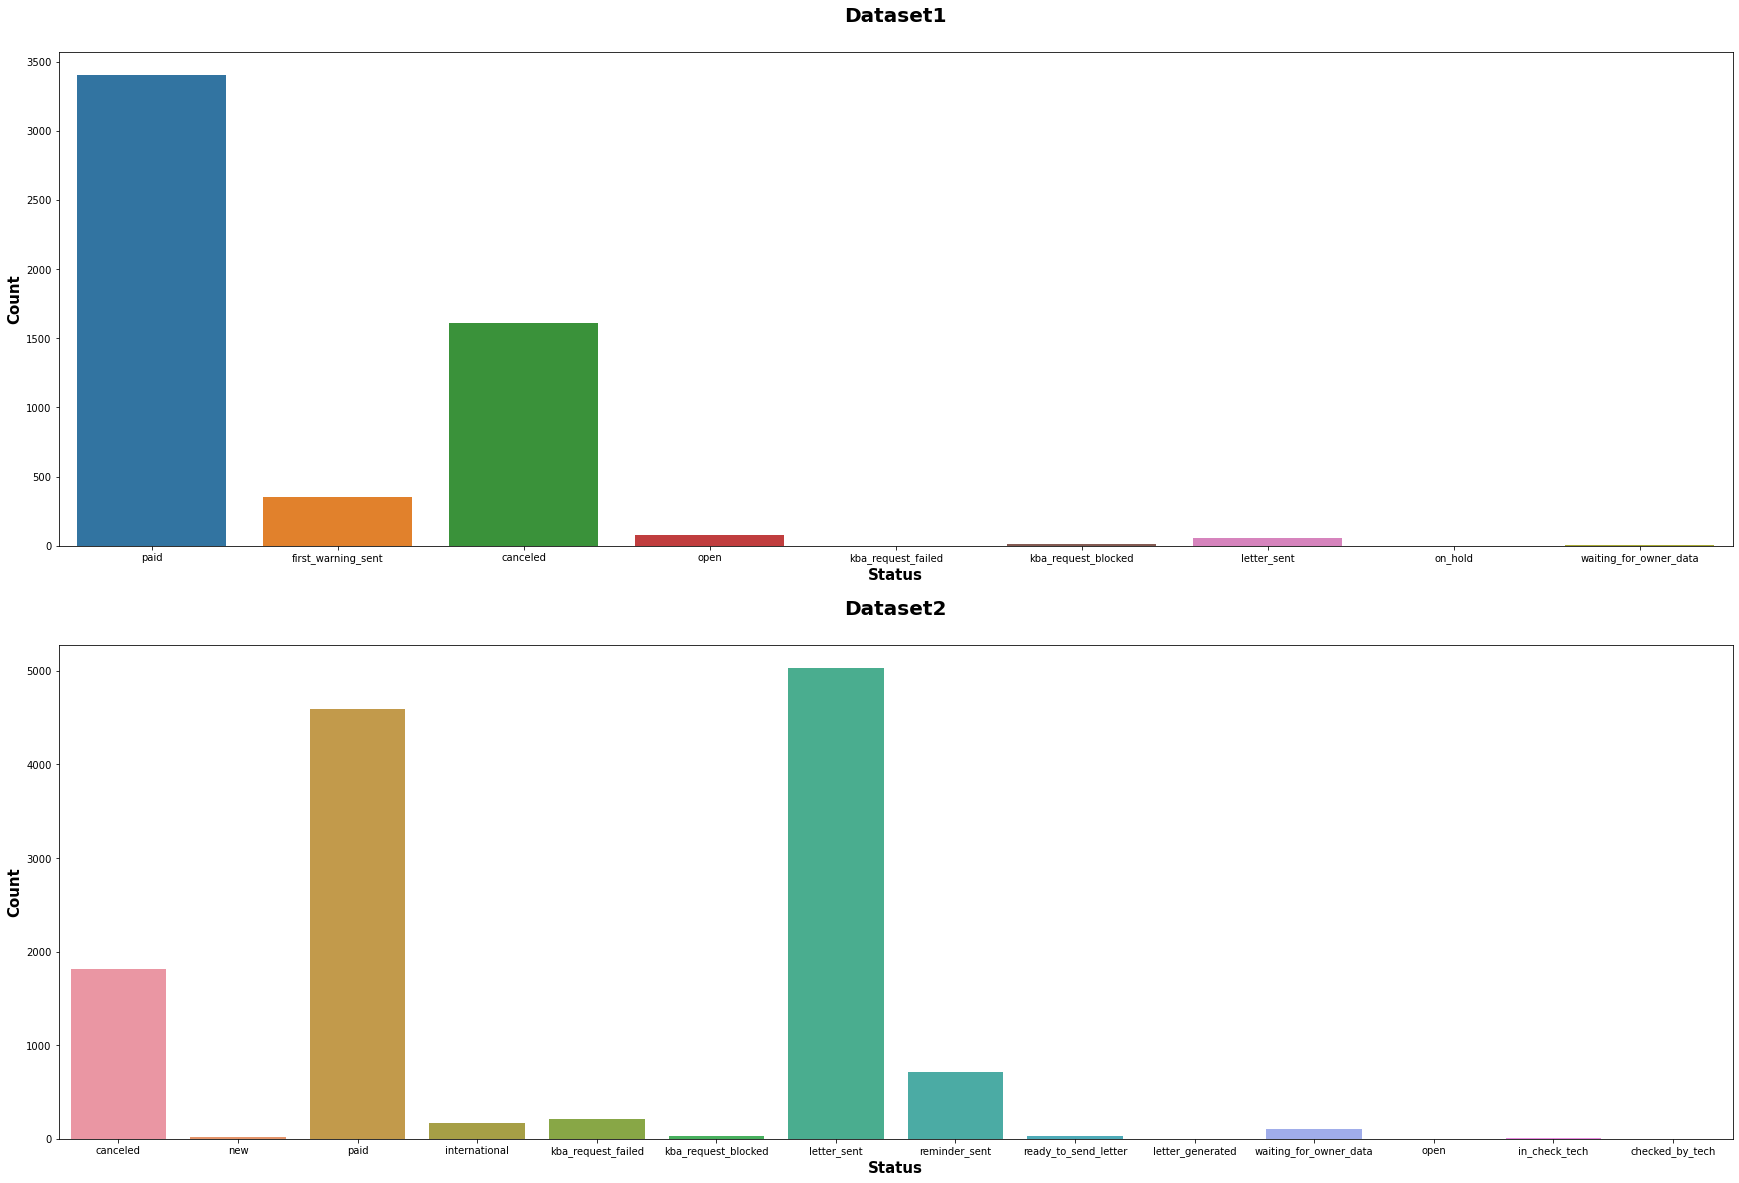

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (30,20))

sns.countplot(data1["Status"],ax=ax1)
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("Status", weight = "bold", fontsize = 15)
ax1.set_ylabel("Count", weight = "bold", fontsize = 15)
sns.countplot(data2["Status"], ax=ax2)
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("Status", weight = "bold", fontsize = 15)
ax2.set_ylabel("Count", weight = "bold", fontsize = 15)

In [67]:
#Payment rate in dataset 1
total_already_paid_1= data1[data1["Status"].isin(["paid", "first_warning_sent","letter_sent"])]["Already paid"].sum()
total_pay_1 = data1[data1["Status"].isin(["paid", "first_warning_sent","letter_sent"])]["Total Pay"].sum()
payment_rate_1 = (total_already_paid_1/total_pay_1)*100
print(f"{payment_rate_1:.2f}%")

85.32%


In [91]:
#Payment rate in dataset 2
total_already_paid_2= data2[data2["Status"].isin(["paid", "first_warning_sent","letter_sent"])]["Already paid"].sum()
total_pay_2 = data2[data2["Status"].isin(["paid", "reminder_sent","letter_sent","checked_by_tech"])]["Total Pay"].sum()
payment_rate_2 = (total_already_paid_2/total_pay_2)*100
print(f"{payment_rate_2:.2f}%")

42.92%


In [69]:
#Transform datatype
data1["Day of Violation"] = pd.to_datetime(data1["Day of Violation"])
data1["First Letter"] = pd.to_datetime(data1["First Letter"])
data1["Reminder Sent"] = pd.to_datetime(data1["Reminder Sent"])
data1["First Warning"] = pd.to_datetime(data1["First Warning"])
data1["Cancellation Date"] = pd.to_datetime(data1["Cancellation Date"])
data1["Payment Date"] = pd.to_datetime(data1["Payment Date"])

data2["Day of Violation"] = pd.to_datetime(data2["Day of Violation"])
data2["First Letter"] = pd.to_datetime(data2["First Letter"])
data2["Reminder Sent"] = pd.to_datetime(data2["Reminder Sent"])
data2["First Warning"] = pd.to_datetime(data2["First Warning"])
data2["Cancellation Date"] = pd.to_datetime(data2["Cancellation Date"])
data2["Payment Date"] = pd.to_datetime(data2["Payment Date"])

In [70]:
data1["first_ticket_period"] = data1["First Letter"] - data1["Day of Violation"] #period from date of violation to date of first notice
data1["pay_after_first_ticket_period"] = data1["Payment Date"] - data1["First Letter"] #period from date of first notice to the date of payment

data2["first_ticket_period"] = data2["First Letter"] - data2["Day of Violation"]
data2["pay_after_first_ticket_period"] = data2["Payment Date"] - data2["First Letter"]

In [71]:
data1.head()

,ID,Status,Fine to pay,Already paid,Extra Charges,Cancellation Date,Cancellation Reason,Payment Date,Parking duration,Day of Violation,First Letter,Reminder Sent,First Warning,Lot,Total Pay,Allowed duration,Exceeded duration,License plate city code,first_ticket_period,pay_after_first_ticket_period
0,1,paid,30,30,10,NaT,NaN,2015-11-24,158,2015-11-10,2015-11-12,NaT,NaT,A026,40,120,38,M,2 days,12 days
1,2,first_warning_sent,30,0,15,NaT,NaN,NaT,1038,2015-11-20,2016-01-12,2016-01-29,2016-02-16,A036,45,120,918,MZ,53 days,NaT
2,3,paid,40,40,0,NaT,NaN,2015-11-20,666,2015-11-06,2015-11-09,NaT,NaT,A109,40,150,516,MTK,3 days,11 days
3,4,paid,20,20,0,NaT,NaN,2015-11-19,74,2015-11-10,2015-11-12,NaT,NaT,A129,20,80,-6,FR,2 days,7 days
4,5,paid,30,40,10,NaT,NaN,2015-12-08,225,2015-11-06,2015-11-27,NaT,NaT,A009,40,185,40,M,21 days,11 days


In [72]:
#truncate "days"
data1["first_ticket_period"] = data1["first_ticket_period"].dt.days
data1["pay_after_first_ticket_period"] = data1["pay_after_first_ticket_period"].dt.days

data2["first_ticket_period"] = data2["first_ticket_period"].dt.days
data2["pay_after_first_ticket_period"] = data2["pay_after_first_ticket_period"].dt.days

Text(0, 0.5, 'Frequency')

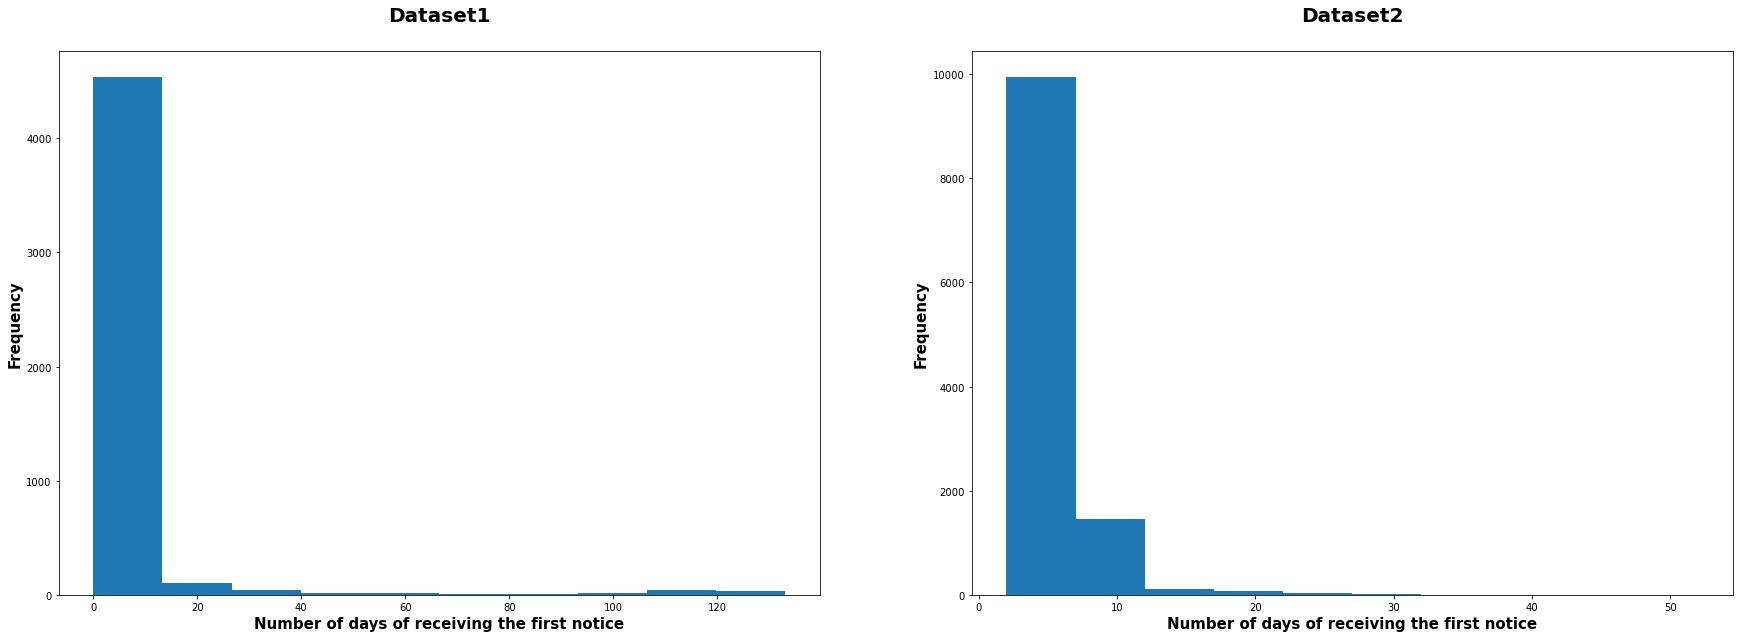

In [73]:
#Key Performance indicators:
# 1st: How quickly parkdepot's product/system react when a offense occurred (product driven)
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))
ax1.hist(data1["first_ticket_period"])
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("Number of days of receiving the first notice", weight = "bold", fontsize = 15)
ax1.set_ylabel("Frequency", weight = "bold", fontsize = 15)
ax2.hist(data2["first_ticket_period"])
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("Number of days of receiving the first notice", weight = "bold", fontsize = 15)
ax2.set_ylabel("Frequency", weight = "bold", fontsize = 15)

In [74]:
#As we can see from both graphs, most of the offenced cases are immediately recoreded and the first notice had been sent within 15 days

Text(0, 0.5, 'Number of days of receiving the first notice')

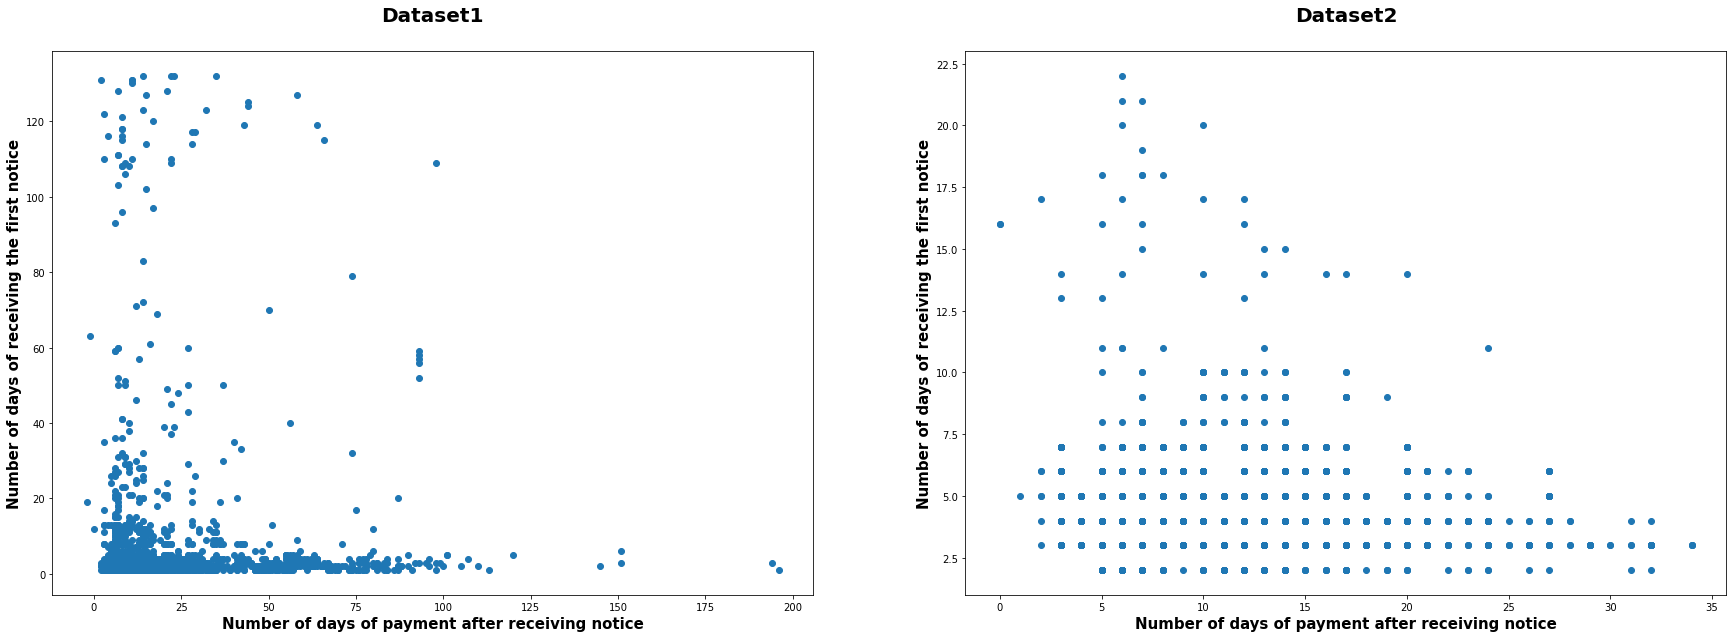

In [75]:
#Customer's payment time upon receipt of notice (revenue driven)

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))

ax1.scatter(x=data1["pay_after_first_ticket_period"], y = data1["first_ticket_period"])
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("Number of days of payment after receiving notice", weight = "bold", fontsize = 15)
ax1.set_ylabel("Number of days of receiving the first notice", weight = "bold", fontsize = 15)
ax2.scatter(x=data2["pay_after_first_ticket_period"], y = data2["first_ticket_period"])
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("Number of days of payment after receiving notice", weight = "bold", fontsize = 15)
ax2.set_ylabel("Number of days of receiving the first notice", weight = "bold", fontsize = 15)

In [ ]:
#The payment of customer obviously affect to revenue of company. The ability to collect fees from violators is likely to depend on the speed at which notifications are sent from the system.

In [76]:
#Key Performance indicators:
## 2rd: Cancellation rate
Cancellation_rate_1 = (len(data1[data1["Status"] == "canceled"])/len(data1["Status"]))*100
Cancellation_rate_2 = (len(data2[data2["Status"] == "canceled"])/len(data2["Status"]))*100
print(f"{Cancellation_rate_1:.2f}%")
print(f"{Cancellation_rate_2:.2f}%")

29.19%
14.26%


C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

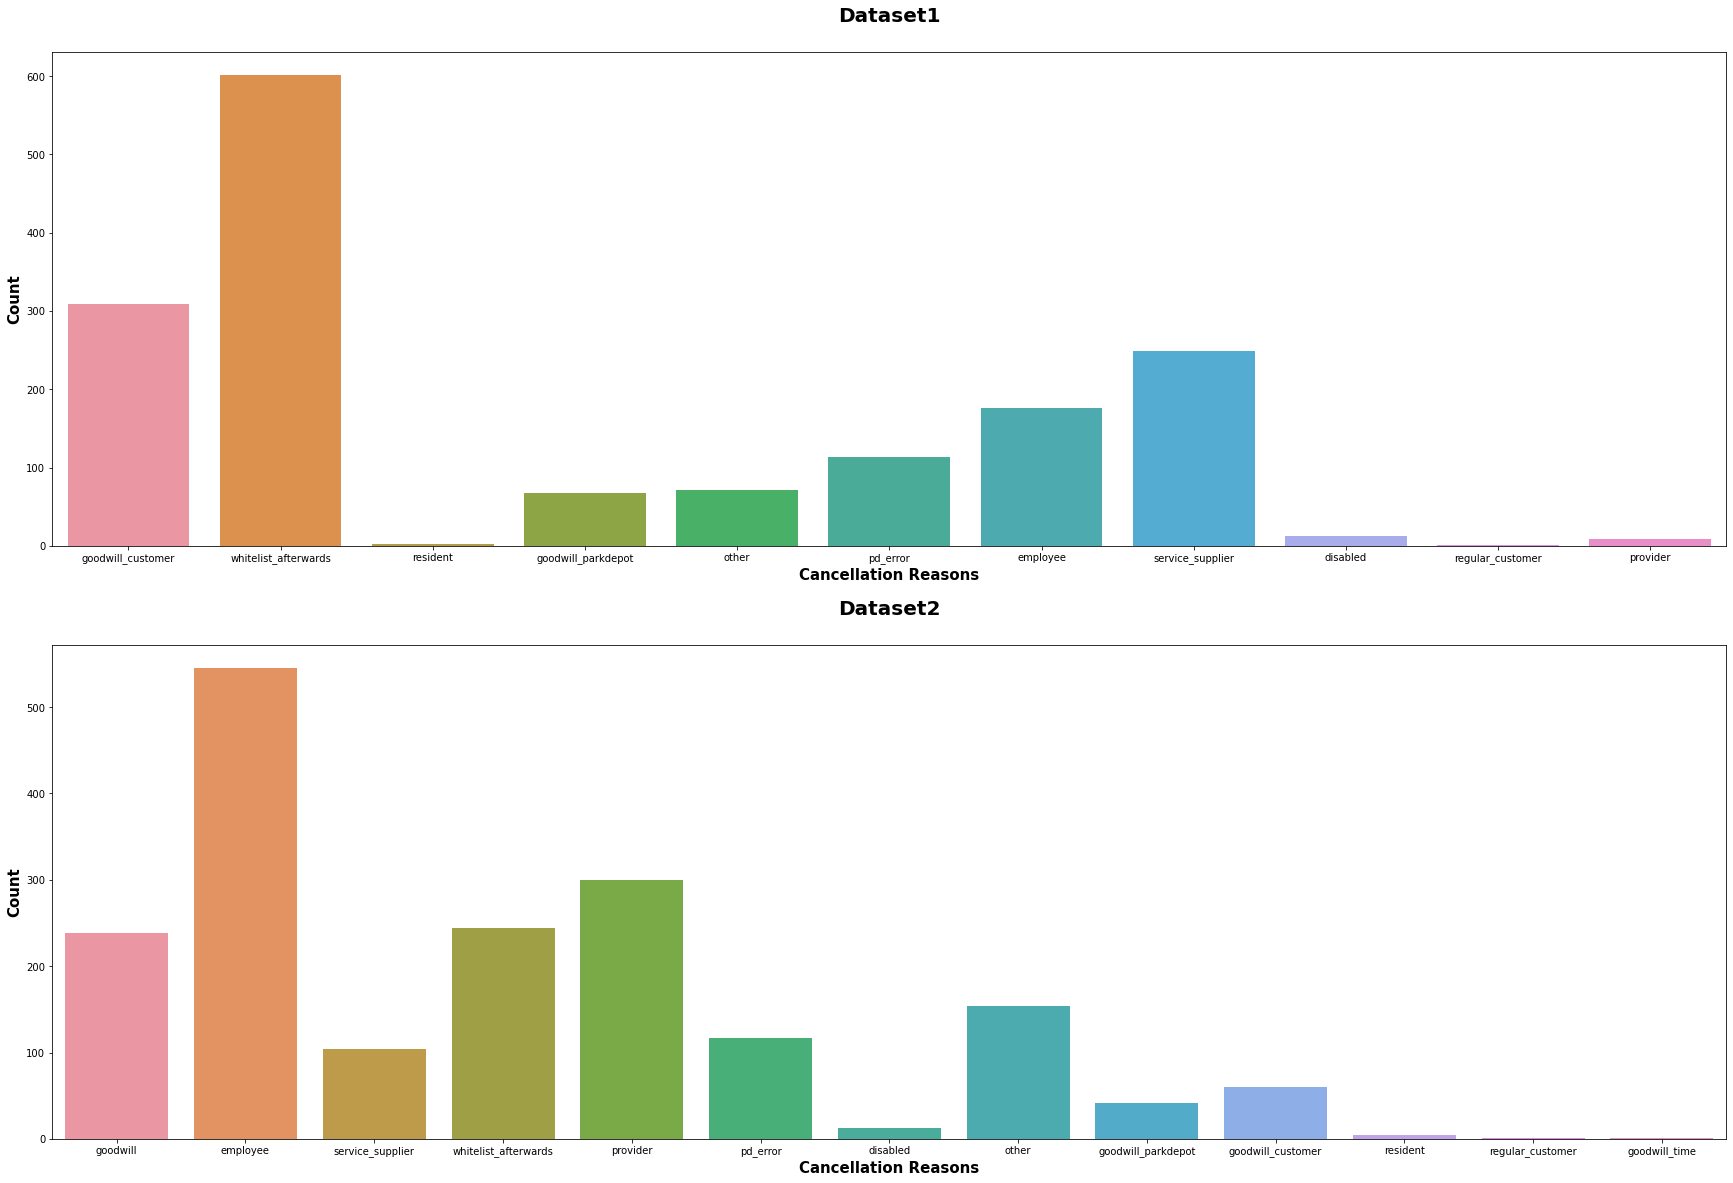

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (30,20))

sns.countplot(data1["Cancellation Reason"],ax=ax1)
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("Cancellation Reasons", weight = "bold", fontsize = 15)
ax1.set_ylabel("Count", weight = "bold", fontsize = 15)
sns.countplot(data2["Cancellation Reason"], ax=ax2)
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("Cancellation Reasons", weight = "bold", fontsize = 15)
ax2.set_ylabel("Count", weight = "bold", fontsize = 15)

In [ ]:
# In dataset 1, the most common reason for cancellation is whitelist_afterwards and is employee in case of dataset 2
# The cancellation rate shows the performance of the company's system in classifying violations. The rate is quite high in dataset 1 (one-third) and better in dataset 2 (15%)

Text(0, 0.5, 'Count')

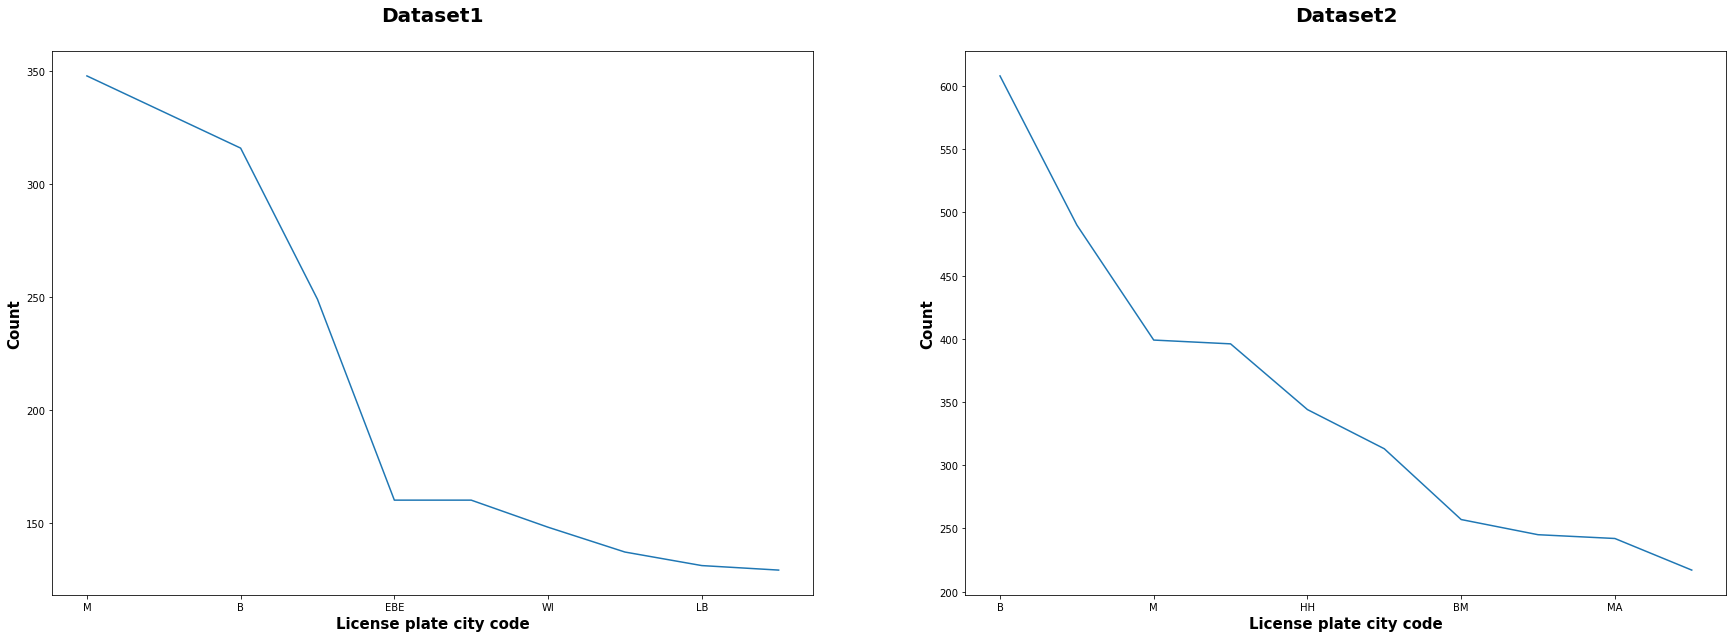

In [103]:
#Offence specific statistics

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))

data1["License plate city code"].value_counts().head(10).plot(ax=ax1)
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("License plate city code", weight = "bold", fontsize = 15)
ax1.set_ylabel("Count", weight = "bold", fontsize = 15)
data2["License plate city code"].value_counts().head(10).plot(ax=ax2)
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("License plate city code", weight = "bold", fontsize = 15)
ax2.set_ylabel("Count", weight = "bold", fontsize = 15)

In [ ]:
#Most of Offences cases happened in M and B city code

Text(0.5, 1.0, 'Dataset2')

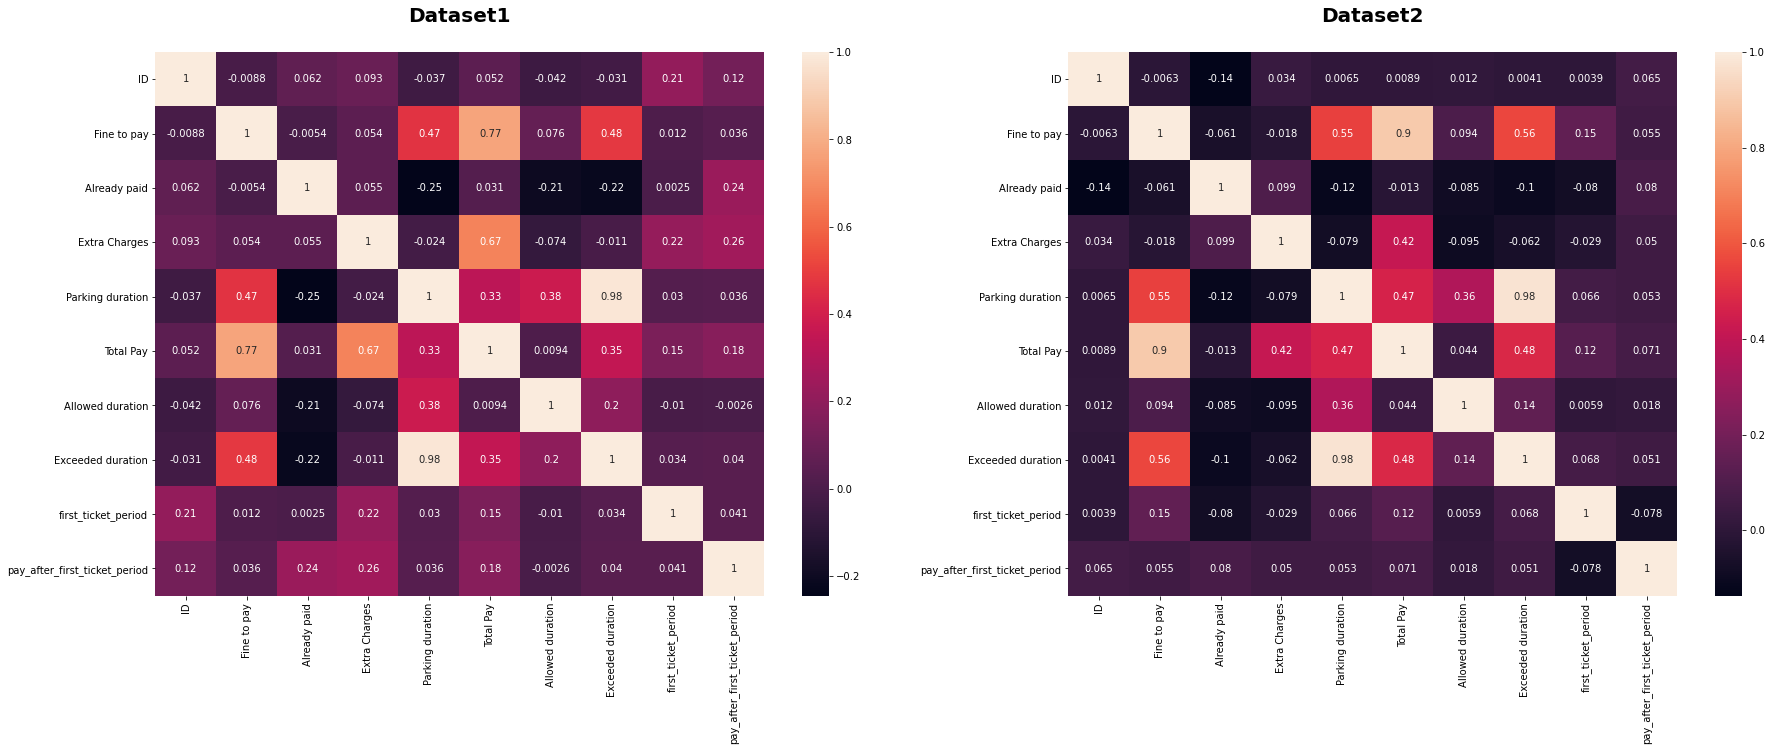

In [13]:
#General behavior of parking-offenders?

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))

sns.heatmap(data1.corr(), annot=True, ax=ax1)
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
sns.heatmap(data2.corr(), annot=True, ax=ax2)
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)


In [14]:
#There is strong correlation between Parking duration and Exceed duration in both Dataset

In [15]:
data1.corr()["Parking duration"].sort_values(ascending = False).to_frame().T

,Parking duration,Exceeded duration,Fine to pay,Allowed duration,Total Pay,pay_after_first_ticket_period,first_ticket_period,Extra Charges,ID,Already paid
Parking duration,1.0,0.982546,0.469776,0.380386,0.332251,0.03645,0.03009,-0.024015,-0.037258,-0.245149


In [16]:
data2.corr()["Parking duration"].sort_values(ascending = False).to_frame().T

,Parking duration,Exceeded duration,Fine to pay,Total Pay,Allowed duration,first_ticket_period,pay_after_first_ticket_period,ID,Extra Charges,Already paid
Parking duration,1.0,0.975581,0.550946,0.466771,0.357601,0.065588,0.052717,0.006488,-0.079262,-0.115584


Text(0, 0.5, 'Parking duration')

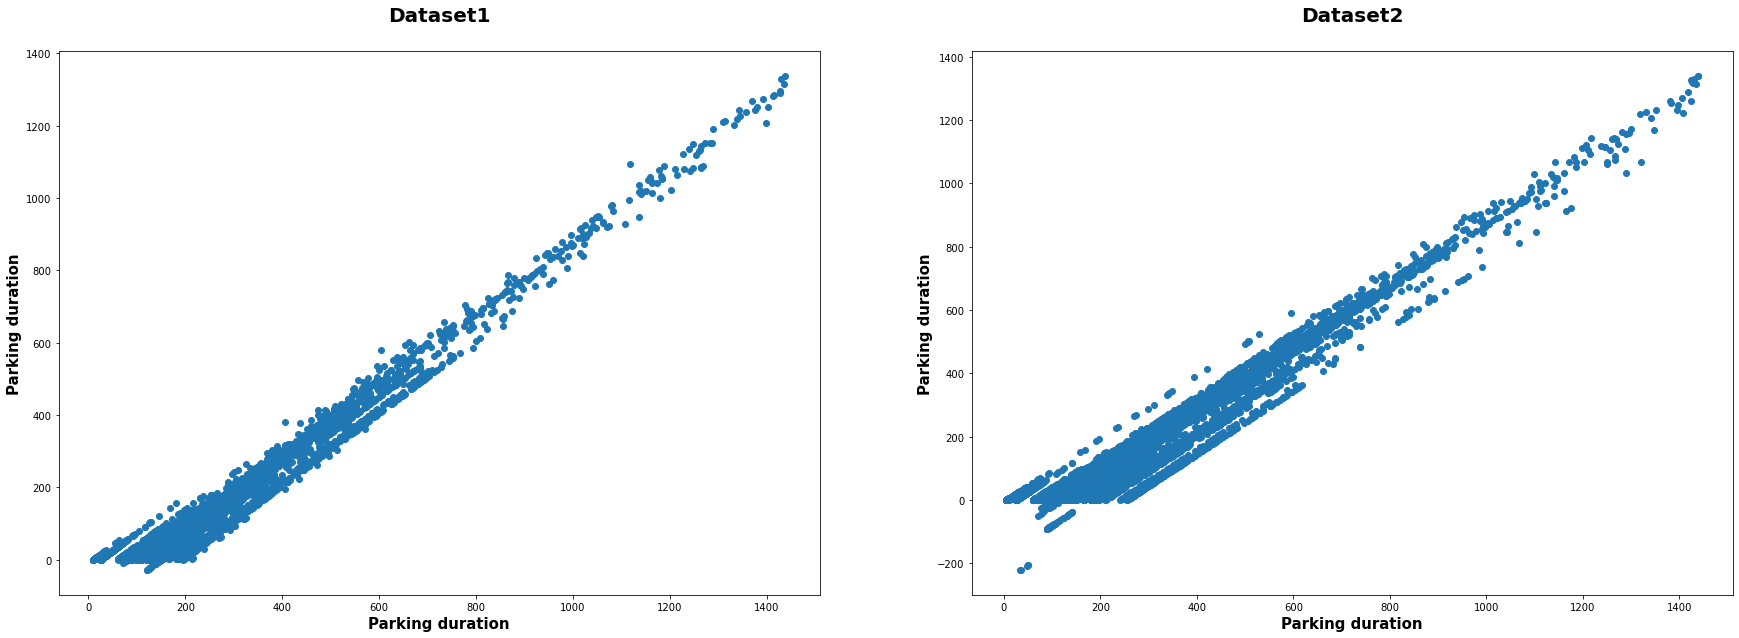

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))

ax1.scatter(x=data1['Parking duration'], y = data1['Exceeded duration'])
ax1.set_title("Dataset1", weight = "bold", fontsize = 20, pad = 30)
ax1.set_xlabel("Parking duration", weight = "bold", fontsize = 15)
ax1.set_ylabel("Parking duration", weight = "bold", fontsize = 15)
ax2.scatter(x=data2['Parking duration'], y = data2['Exceeded duration'])
ax2.set_title("Dataset2", weight = "bold", fontsize = 20, pad = 30)
ax2.set_xlabel("Parking duration", weight = "bold", fontsize = 15)
ax2.set_ylabel("Parking duration", weight = "bold", fontsize = 15)

In [18]:
#The longer the parking duration is, the higher the chance people exceed the limit.

In [19]:
#Changes during the time between the first and second data set?

#1. The payment rate decreased by 50% in dataset2 compared to dataset1
#2. The first notice period shorter in Dataset 2, mostly less than 13 days and the latest period is 33 days which is far better than more than 120 notice days in Dataset 1
#3. While most of people pay the fine after receive first notive in Dataset 1, in Dataset 2, the payment was evenly distributed between two and 33 days after the first notification is received.

In [20]:
#Where do you see the most urgent need for improvement in our system?

#Eventhough there was improvement in the length of notice period between two Datasets. There were still many cases took up to 20 days to be sent. This is obviously the aspect needed to be improved
#Try to lower cancellation rate 


In [21]:
#What additional data would be useful to have?

#The Datasets is more usefull if there is information about the payment of Extra Charges to check the payment situation.